         Duration       Pulse    Maxpulse     Calories
count  169.000000  169.000000  169.000000   164.000000
mean    63.846154  107.461538  134.047337   375.790244
std     42.299949   14.510259   16.450434   266.379919
min     15.000000   80.000000  100.000000    50.300000
25%     45.000000  100.000000  124.000000   250.925000
50%     60.000000  105.000000  131.000000   318.600000
75%     60.000000  111.000000  141.000000   387.600000
max    300.000000  159.000000  184.000000  1860.400000

Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64

          Calories       Pulse
min      50.300000   80.000000
max    1860.400000  159.000000
count   169.000000  169.000000
mean    375.790244  107.461538


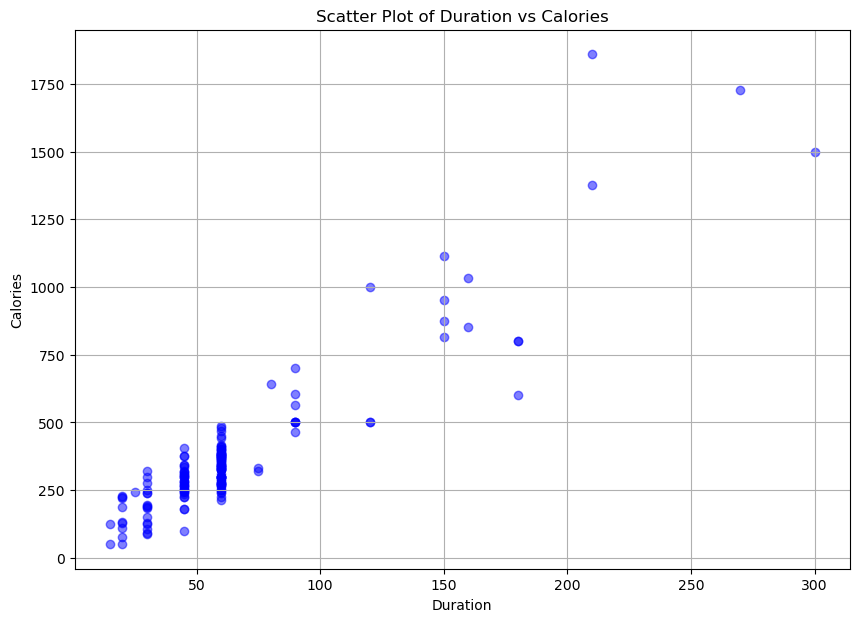

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('data.csv')  #file path

# Basic statistical description
description = df.describe()
print (df.describe())
print()

# Check for null values
null_values = df.isnull().sum()
print ( df.isnull().sum())

# Replace null values with the mean
df_filled = df.fillna(df.mean())

# Aggregate two columns
aggregated_data = df_filled[['Calories', 'Pulse']].agg(['min', 'max', 'count', 'mean'])
print()
print ( aggregated_data)

# Filter rows with Calories between 500 and 1000
filtered_500_1000 = df_filled[(df_filled['Calories'] >= 500) & (df_filled['Calories'] <= 1000)]

# Filter rows with Calories > 500 and Pulse < 100
filtered_calories_pulse = df_filled[(df_filled['Calories'] > 500) & (df_filled['Pulse'] < 100)]

# Create new DataFrame without 'Maxpulse'
df_modified = df_filled.drop(columns=['Maxpulse'])

# Delete 'Maxpulse' from original DataFrame
df.drop(columns=['Maxpulse'], inplace=True)

# Convert 'Calories' to integer
df_filled['Calories'] = df_filled['Calories'].astype(int)

# Scatter plot for 'Duration' and 'Calories'
plt.figure(figsize=(10, 7))
plt.scatter(df_filled['Duration'], df_filled['Calories'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Duration vs Calories')
plt.xlabel('Duration')
plt.ylabel('Calories')
plt.grid(True)
plt.show()


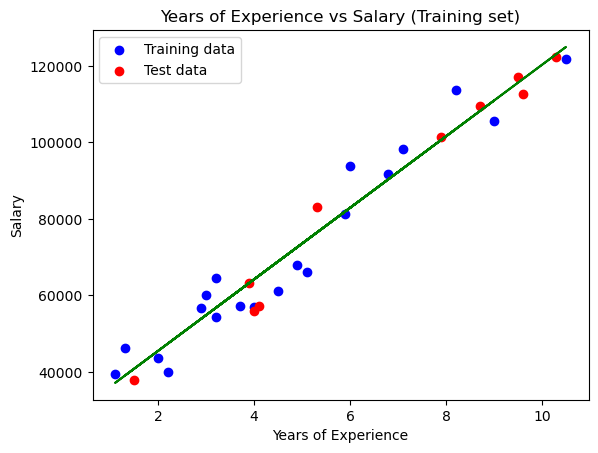

Mean Squared Error: 21026037.329511296


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Importing the dataset
df = pd.read_csv('Salary_Data (2).csv')  # Replace with your file path

# Splitting the dataset into the training set and test set
X = df.iloc[:, :-1].values  # Independent variable 'YearsExperience'
y = df.iloc[:, -1].values   # Dependent variable 'Salary'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

# Fitting Simple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Visualizing the Training set results
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='red', label='Test data')
plt.plot(X_train, regressor.predict(X_train), color='green')
plt.title('Years of Experience vs Salary (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

print("Mean Squared Error:", mse)
